<a href="https://colab.research.google.com/github/03axdov/Notebooks/blob/main/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import PIL

from tensorflow.keras import layers

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [3]:
print(list(data_dir.glob('*')))

[PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'), PosixPath('/root/.keras/datasets/flower_photos/roses'), PosixPath('/root/.keras/datasets/flower_photos/daisy'), PosixPath('/root/.keras/datasets/flower_photos/sunflowers'), PosixPath('/root/.keras/datasets/flower_photos/dandelion'), PosixPath('/root/.keras/datasets/flower_photos/tulips')]


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

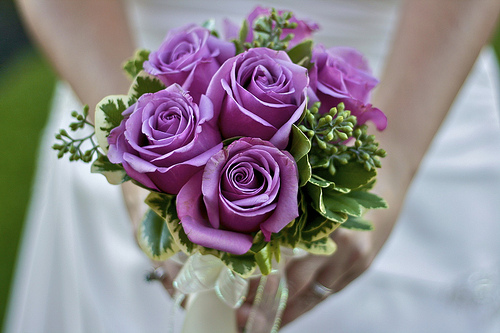

In [5]:
roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(roses[0])

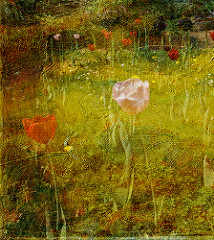

In [6]:
tulips = list(data_dir.glob("tulips/*.jpg"))
PIL.Image.open(tulips[0])

In [7]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
print(next(iter(train_ds))[0].numpy().astype("uint8"))

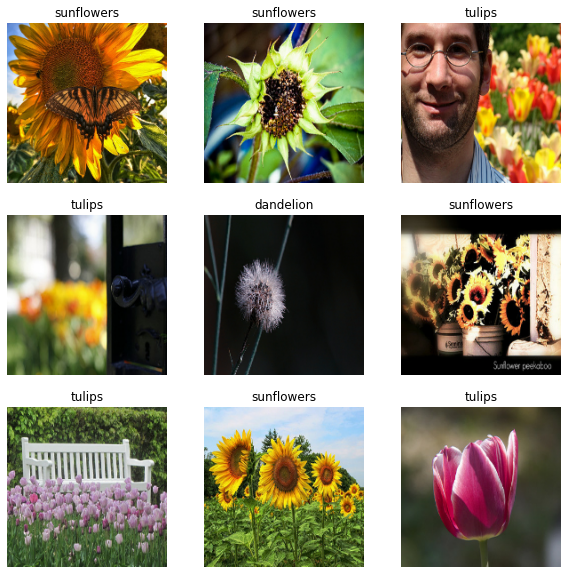

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [27]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    layers.Rescaling(1 / 255., input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [30]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/10
92/92 [==============================] - 3s 26ms/step - loss: 1.5108 - accuracy: 0.3215 - val_loss: 1.3237 - val_accuracy: 0.4319
Epoch 2/10
92/92 [==============================] - 2s 24ms/step - loss: 1.0787 - accuracy: 0.5671 - val_loss: 1.0643 - val_accuracy: 0.5695
Epoch 3/10
92/92 [==============================] - 2s 24ms/step - loss: 0.8842 - accuracy: 0.6649 - val_loss: 1.0094 - val_accuracy: 0.5981
Epoch 4/10
92/92 [==============================] - 2s 24ms/step - loss: 0.6767 - accuracy: 0.7490 - val_loss: 0.9772 - val_accuracy: 0.6362
Epoch 5/10
92/92 [==============================] - 2s 24ms/step - loss: 0.4639 - accuracy: 0.8372 - val_loss: 1.1112 - val_accuracy: 0.6172
Epoch 6/10
92/92 [==============================] - 2s 24ms/step - loss: 0.3013 - accuracy: 0.8971 - val_loss: 1.2863 - val_accuracy: 0.6226
Epoch 7/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1771 - accuracy: 0.9462 - val_loss: 1.5087 - val_accuracy: 0.6458
Epoch 8/10
92

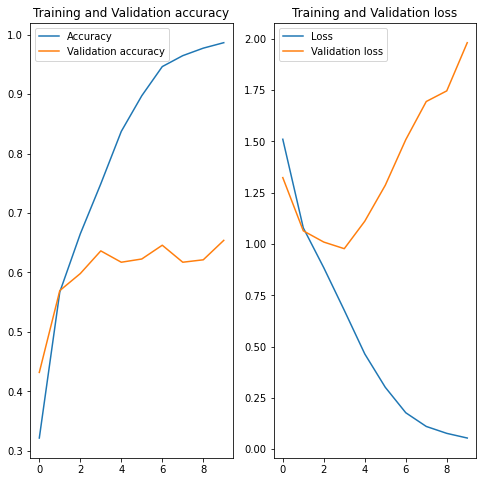

In [31]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy, label="Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc="upper left")
plt.title("Training and Validation loss")

plt.show()

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

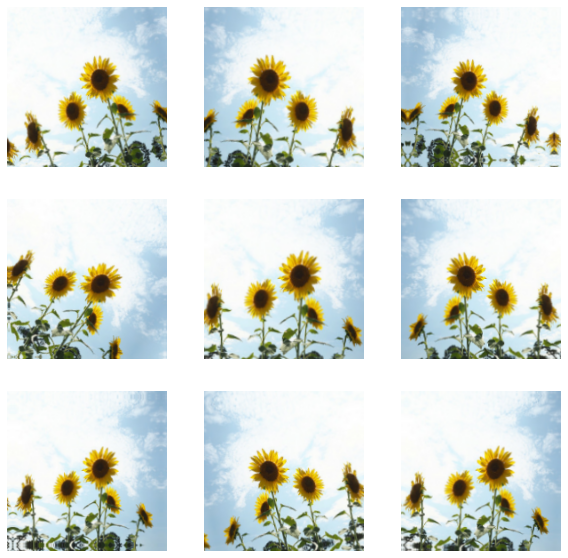

In [43]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [44]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1 / 255.),
    layers.Conv2D(16, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
  ])

In [47]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [49]:
EPOCHS = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/15
92/92 [==============================] - 4s 29ms/step - loss: 1.3562 - accuracy: 0.4206 - val_loss: 1.0810 - val_accuracy: 0.5640
Epoch 2/15
92/92 [==============================] - 3s 28ms/step - loss: 1.0389 - accuracy: 0.5916 - val_loss: 0.9829 - val_accuracy: 0.6076
Epoch 3/15
92/92 [==============================] - 3s 28ms/step - loss: 0.9082 - accuracy: 0.6420 - val_loss: 0.9212 - val_accuracy: 0.6403
Epoch 4/15
92/92 [==============================] - 3s 28ms/step - loss: 0.8432 - accuracy: 0.6727 - val_loss: 0.8468 - val_accuracy: 0.6798
Epoch 5/15
92/92 [==============================] - 3s 27ms/step - loss: 0.8170 - accuracy: 0.6744 - val_loss: 0.8737 - val_accuracy: 0.6880
Epoch 6/15
92/92 [==============================] - 3s 28ms/step - loss: 0.7650 - accuracy: 0.7047 - val_loss: 0.8751 - val_accuracy: 0.6907
Epoch 7/15
92/92 [==============================] - 3s 27ms/step - loss: 0.7254 - accuracy: 0.7108 - val_loss: 0.7641 - val_accuracy: 0.7098
Epoch 8/15
92

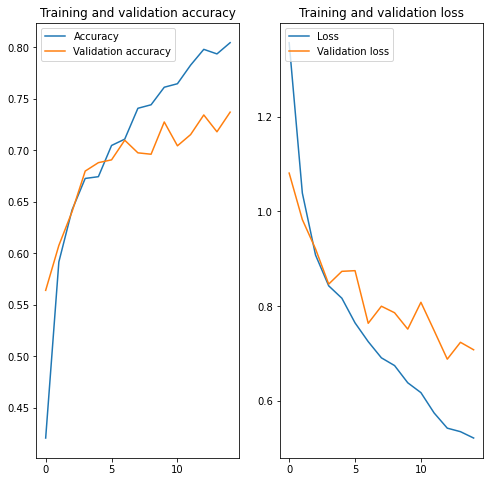

In [52]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy, label="Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation accuracy")
plt.legend(loc="upper left")
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc="upper left")
plt.title("Training and validation loss")

plt.show()